# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.datasets import fetch_openml, make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [6]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(data_id=42165, as_frame=True)
X = boston.data
y = boston.target

In [7]:
X.shape, y.shape

((1460, 80), (1460,))

# Make a Dataset

In [17]:
np.random.seed(42)
X, y = make_circles(n_samples=1000, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X.shape, y.shape

((1000, 2), (1000,))

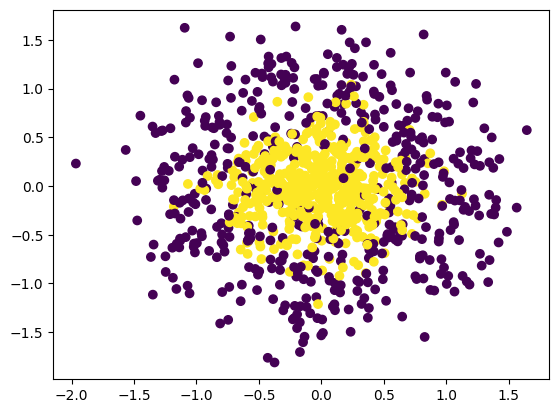

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)

# Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Single Classifier

In [30]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(X_train, y_train)

DecisionTreeClassifier()

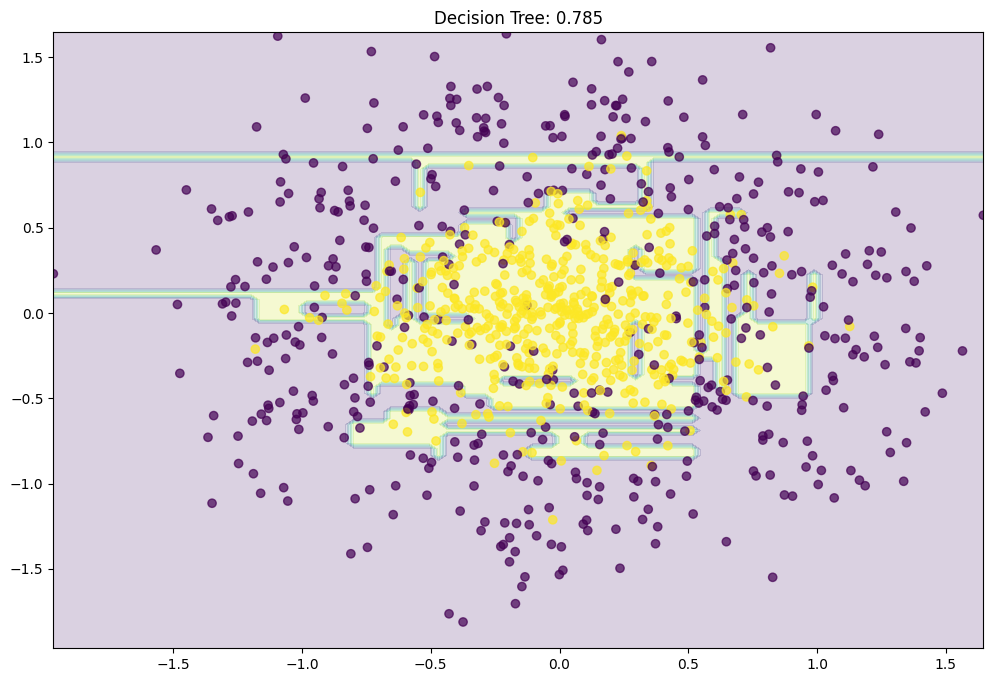

In [38]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtc1.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title(f"Decision Tree: {accuracy_score(y_test, dtc1.predict(X_test))}")
plt.show()

# Using Ensemble (Random Forest)

In [42]:
rfc1 = RandomForestClassifier(n_estimators=100)
rfc1.fit(X_train, y_train)

RandomForestClassifier()

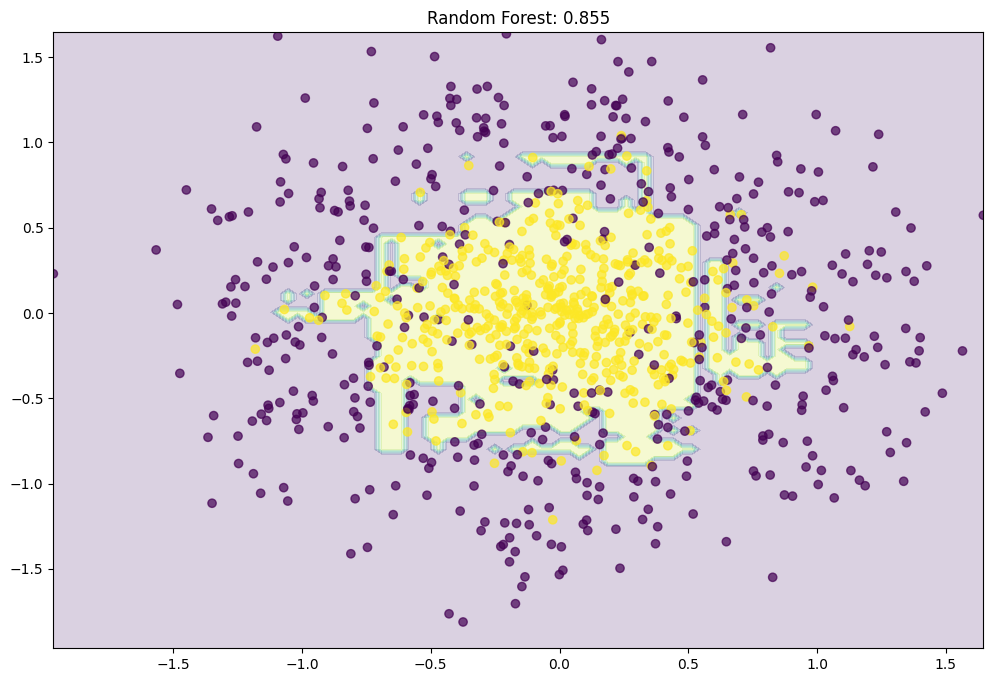

In [43]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rfc1.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title(f"Random Forest: {accuracy_score(y_test, rfc1.predict(X_test))}")
plt.show()

# Check For Regression

## Make Datasets

In [44]:

n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

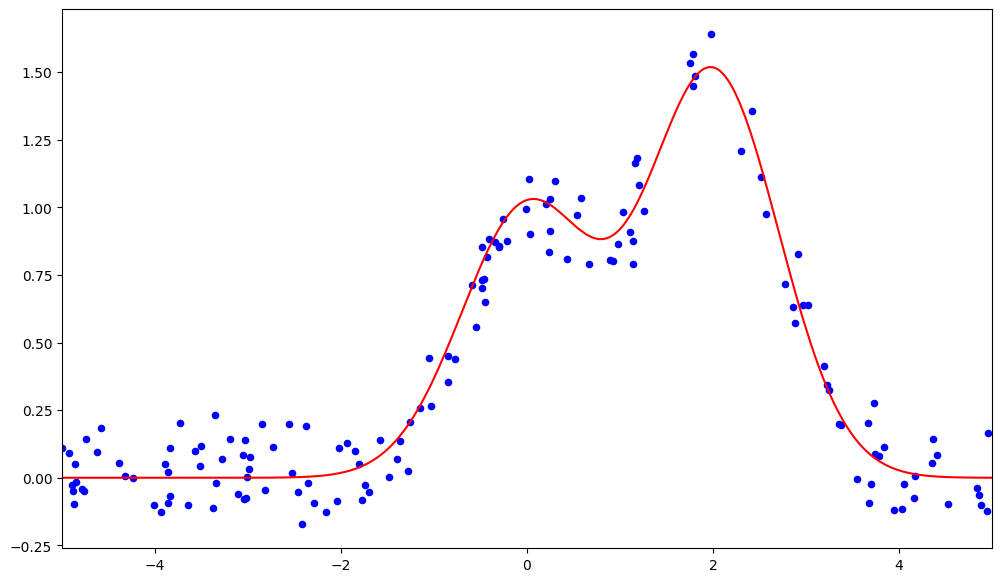

In [46]:
plt.figure(figsize=(12, 7))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 22.25')

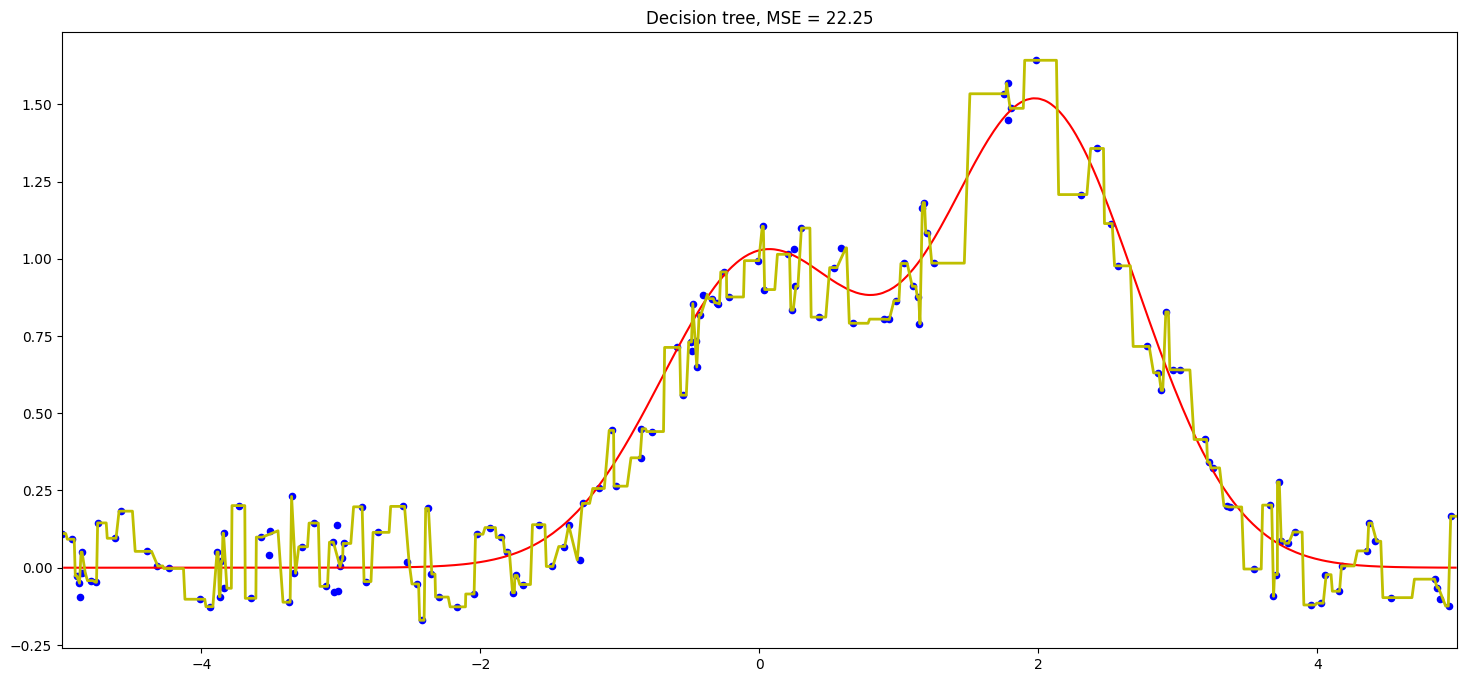

In [63]:
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))

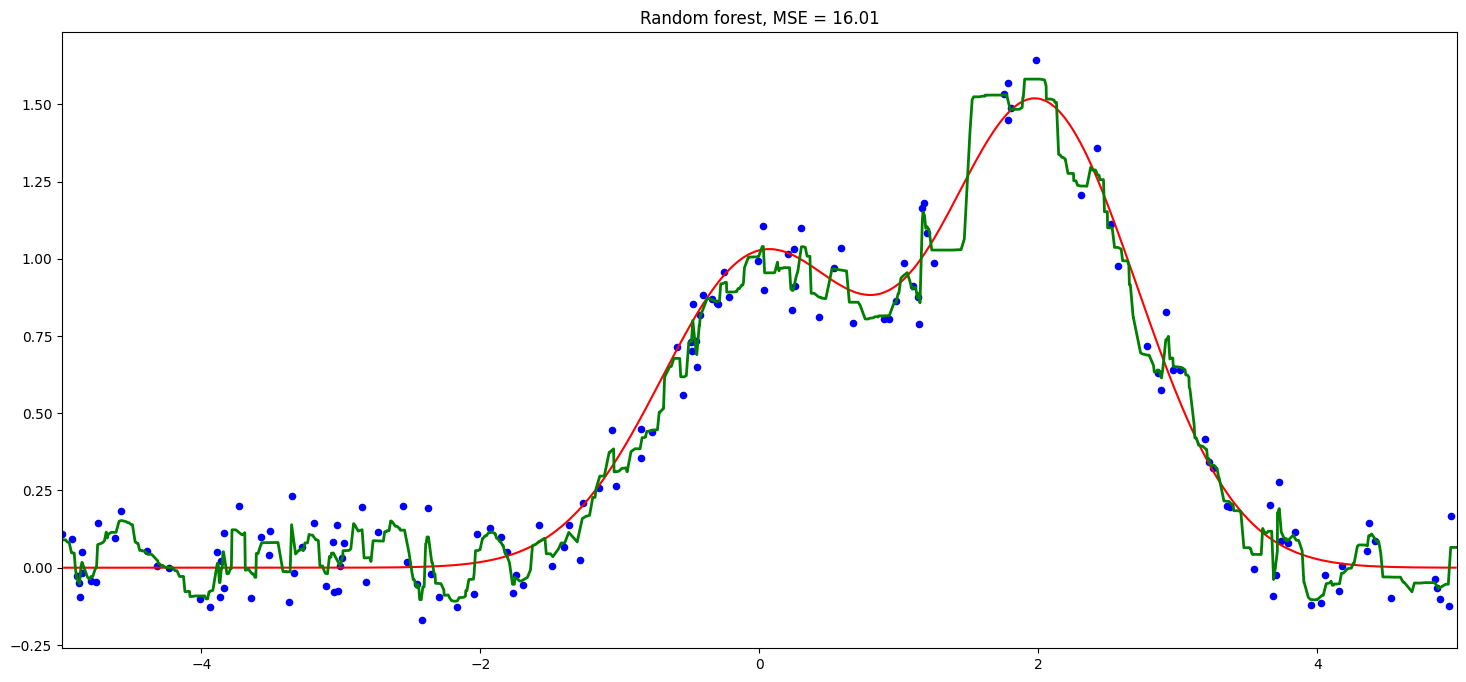

In [48]:
rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

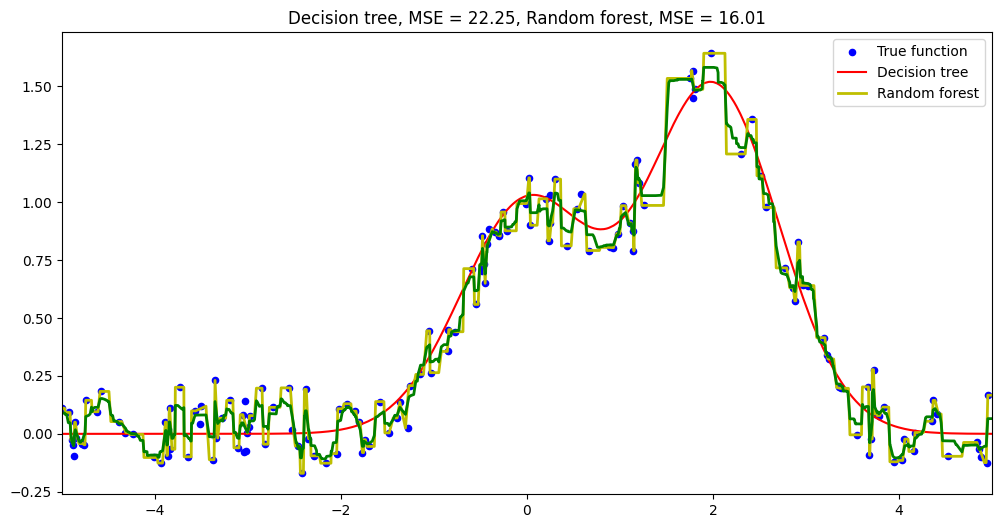

In [62]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, c="b", s=20)

plt.plot(X_test, f(X_test), "r")
plt.plot(X_test, d_predict, "y", lw=2)
plt.plot(X_test, rf_predict, "g", lw=2)

plt.xlim([-5, 5])
plt.legend(["True function", "Decision tree", "Random forest"])
dtmse = np.sum((y_test - d_predict) ** 2)
rfmse = np.sum((y_test - rf_predict) ** 2)
plt.title(f"Decision tree, MSE = {np.round(dtmse, 2)}, Random forest, MSE = {np.round(rfmse, 2)}")
plt.show()